In [1]:
import scanpy as sc
import pandas as pd
import anndata as ad
import numpy as np
import sklearn as sk
from arboreto.utils import load_tf_names

In [2]:
combined_adata = sc.read_h5ad('../data/combined_data_5ht6ho_intersection_highly_var.h5ad')
ht6_adata = sc.read_h5ad('../data/ho6_preprocessed_intersection_.h5ad')
ho5_adata = sc.read_h5ad('../data/ht5_preprocessed_intersection_.h5ad')

In [3]:
filtered_genes_after_highly_variable_cutoff = set(ht6_adata.var_names).union(ho5_adata.var_names)
len(filtered_genes_after_highly_variable_cutoff)

4802

In [4]:
union_filtered_genes_after_highly_variable_cutoff = filtered_genes_after_highly_variable_cutoff.union(combined_adata.var_names)

In [5]:
len(union_filtered_genes_after_highly_variable_cutoff)

4818

In [6]:
tfs = load_tf_names('../data/allTFs_mm.txt')
#tfs = list(set(combined_adata.var_names).intersection(tfs))

In [7]:
len((union_filtered_genes_after_highly_variable_cutoff).intersection(tfs))

432

In [9]:
# Intersection of combined and union of 6HO and 5Ht
int_tf = (set(tfs).intersection((set(combined_adata.var_names).union(filtered_genes_after_highly_variable_cutoff))))
combined_genes = ((set(combined_adata.var_names).union(filtered_genes_after_highly_variable_cutoff)))
de_df = pd.read_csv('../../processed_data/de_genes.csv',index_col=0)
diff_tf = set(tfs).difference(int_tf)
de_tfs_not_hvgs = list(set(de_df.index).intersection(diff_tf))
final_union_filtered_genes_after_highly_variable_cutoff = de_tfs_not_hvgs + list(union_filtered_genes_after_highly_variable_cutoff) + ['P4ha1']
len(final_union_filtered_genes_after_highly_variable_cutoff)

4838

In [11]:
len(set(final_union_filtered_genes_after_highly_variable_cutoff).intersection(tfs))

451

In [12]:
combined_adata_pre_filtered = sc.read_h5ad('../data/combined_data_filtered_5ht6ho_intersection.h5ad')

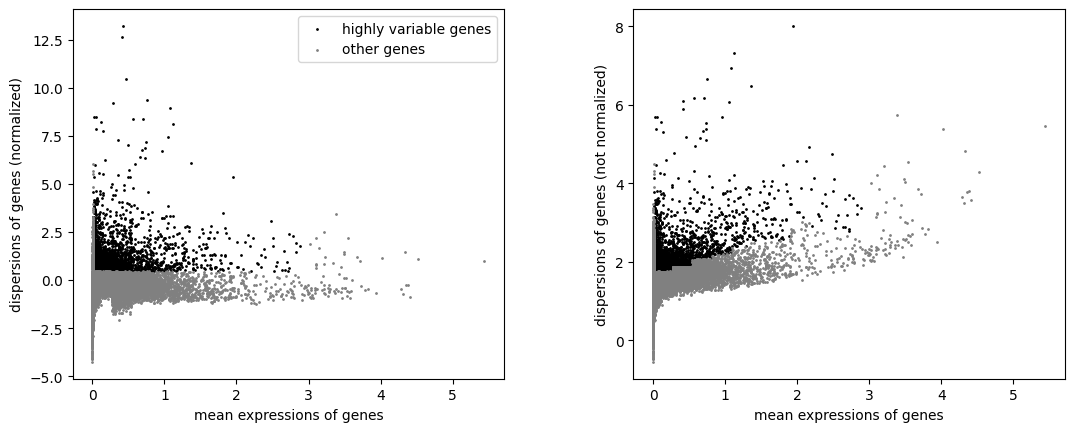

In [13]:
# Total-count normalize (library-size correct) to 10,000 reads/cell
sc.pp.normalize_total(combined_adata_pre_filtered, target_sum=1e4)

# log transform the data - default is natural log, unless specified otherwise

sc.pp.log1p(combined_adata_pre_filtered)

# # identify highly variable genes.
sc.pp.highly_variable_genes(combined_adata_pre_filtered, min_mean=0.0125, max_mean=3, min_disp=0.45) #Absolute value of dispersion is taken, can be seen below.
sc.pl.highly_variable_genes(combined_adata_pre_filtered)

combined_adata_pre_filtered.var.loc[final_union_filtered_genes_after_highly_variable_cutoff, 'highly_variable'] = True
# # keep only highly variable genes:
combined_adata_pre_filtered = combined_adata_pre_filtered[:, combined_adata_pre_filtered.var['highly_variable']]

# # scale each gene to unit variance
# sc.pp.scale(combined_adata_pre_filtered)

In [14]:
sc.pp.scale(combined_adata_pre_filtered)

/home/akshatgupta/anaconda3/envs/pyscenic/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [16]:
combined_adata_pre_filtered.var

,highly_variable,means,dispersions,dispersions_norm,mean,std
feature,,,,,,
Chl1,True,0.023469,1.842613,0.634363,-4.934558e-11,1.0
Tasp1,True,0.044439,1.498004,-0.068669,6.759141e-09,1.0
Sorcs2,True,0.035448,1.577595,0.093703,2.840380e-10,1.0
Clec2g,True,0.022573,2.067685,1.093529,4.808185e-09,1.0
Tlr5,True,0.036059,2.119083,1.198386,-7.377766e-10,1.0
...,...,...,...,...,...,...
Fcho1,True,0.041011,1.696311,0.335895,-8.090268e-09,1.0
Trim30c,True,0.084213,1.910534,0.772927,7.590794e-09,1.0
Kcnc3,True,0.019965,1.690798,0.324648,2.070709e-09,1.0


In [17]:
combined_adata_pre_filtered

AnnData object with n_obs × n_vars = 12381 × 4838
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'percent.rb', 'percent.hb', 'umi_per_gene', 'RNA_snn_res.0.8', 'seurat_clusters', 'mt_filter', 'feature_filter', 'doublet_filter', 'qualtiy_filters', 'RNA_snn_res.0.5', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.5', 'integrated_snn_res.1', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'S.Score', 'G2M.Score', 'cell_cycle_seurat', 'cluster1', 'n_genes', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [19]:
combined_adata_pre_filtered.write_h5ad('../data/combined_data_5ht6hointersection_union_highly_var.h5ad')